In [1]:
!pip install qiskit==0.15.0

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 23.0 MB 8.3 kB/s 
     |████████████████████████████████| 100 kB 5.1 MB/s 
     |████████████████████████████████| 100 kB 2.5 MB/s 
     |████████████████████████████████| 1.8 MB 48.2 MB/s 
     |████████████████████████████████| 200 kB 47.9 MB/s 
     |████████████████████████████████| 29.7 MB 81 kB/s 
     |████████████████████████████████| 635 kB 65.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 60 kB 7.0 MB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 3.2 MB 44.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.15.0-py3-none-any.whl size=1398 sha256=0a713a1b81b526995f93fc3c1f51a92692acee03d12b0a8bdf16d571f741b9e3
  Stored in directory: /root/.cache/pip/wheels/20/f3/76/5a370641d58aa5f2887118316f675e967dd00c087276c5fc7d
 

## This part is for applying bernstein-vazirani algorithm on one of our test set. 

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [3]:
y_test = [-1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1
          ++]
secretnumber = ''
print(secretnumber)

secretnumber = ''
for a in range(len(y_test)):
  if(y_test[a]==1):
    secretnumber = secretnumber+'0'
  if(y_test[a]==-1):
    secretnumber = secretnumber+'1'

print(secretnumber)


111000100110010010


In [4]:
#circuit = QuantumCircuit(8+1, 8)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

In [5]:
!pip install pylatexenc

     |████████████████████████████████| 162 kB 5.0 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=f98ecd897b4200b698516174bd47f75f3f0b0f0e03f83f505eef2878394058d8
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


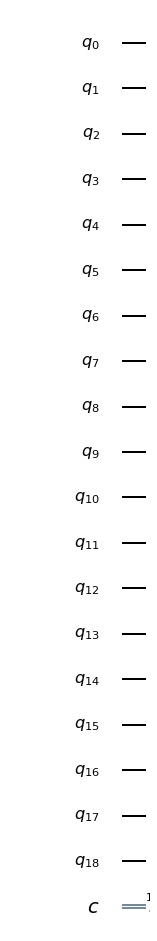

In [6]:
circuit.draw(output='mpl')

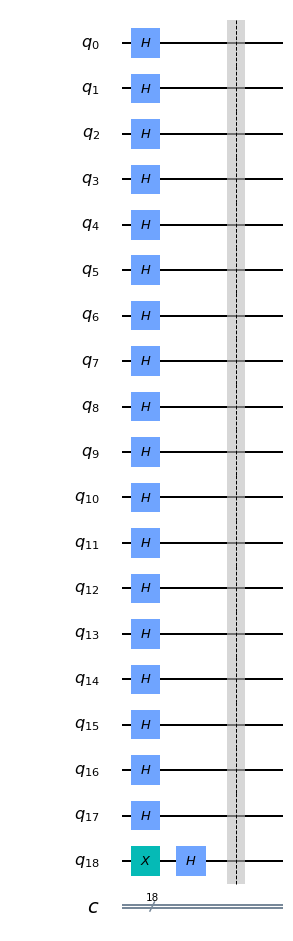

In [7]:
#circuit.h([0, 1, 2, 3, 4, 5, 6, 7])
#circuit.x(8)
#circuit.h(8)
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()
circuit.draw(output='mpl')

In [8]:
#circuit.cx([7, 5, 4, 1, 0], [8])
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
        
        

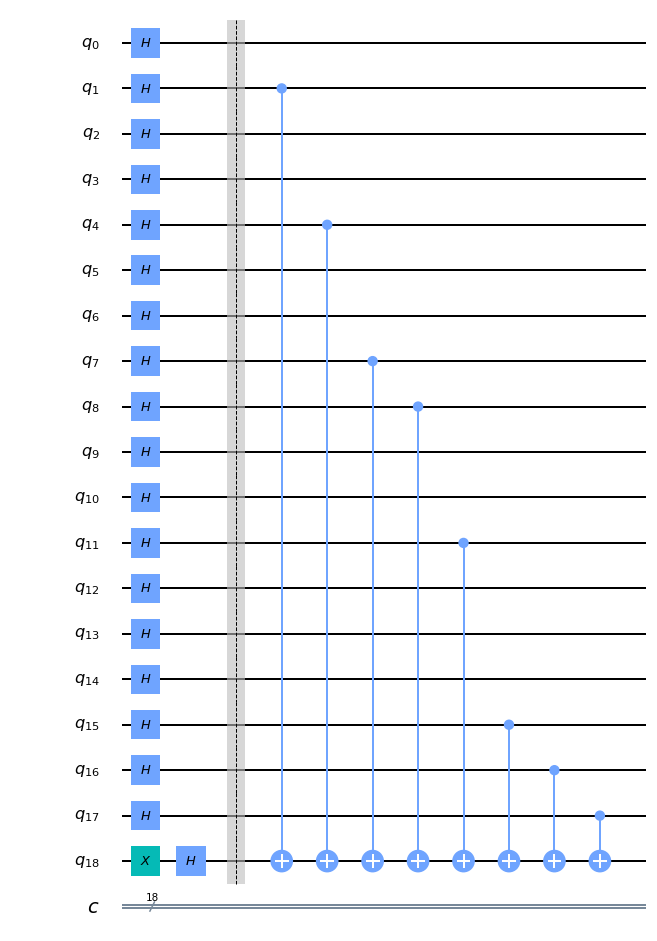

In [9]:
circuit.draw(output='mpl')

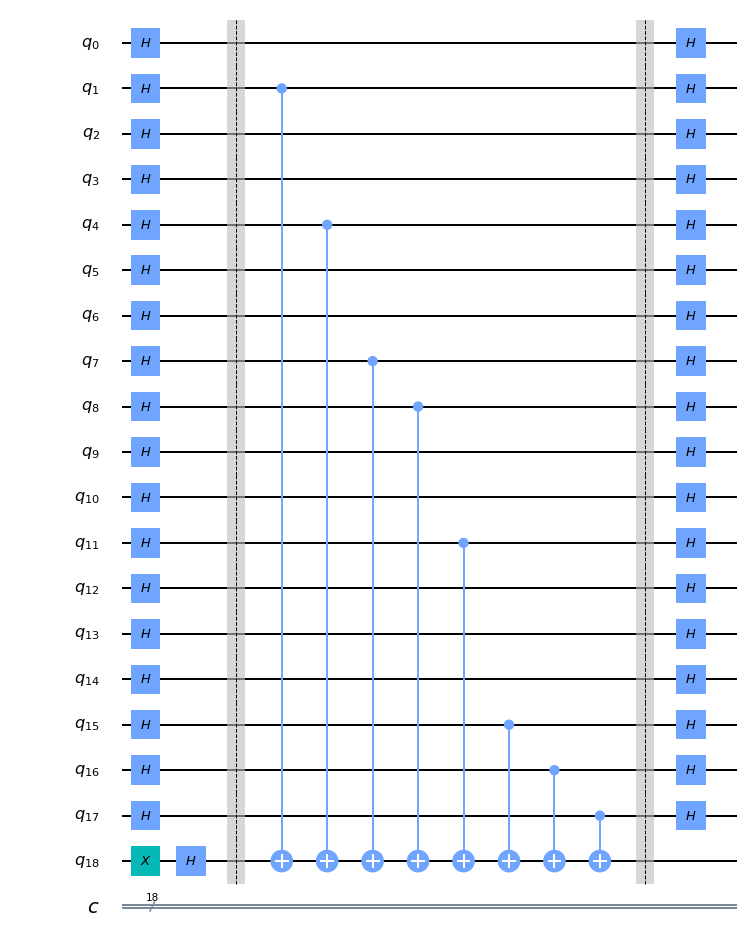

In [10]:
circuit.barrier()
#circuit.h([0, 1, 2, 3, 4, 5, 6, 7])
circuit.h(range(len(secretnumber)))
circuit.draw(output='mpl')

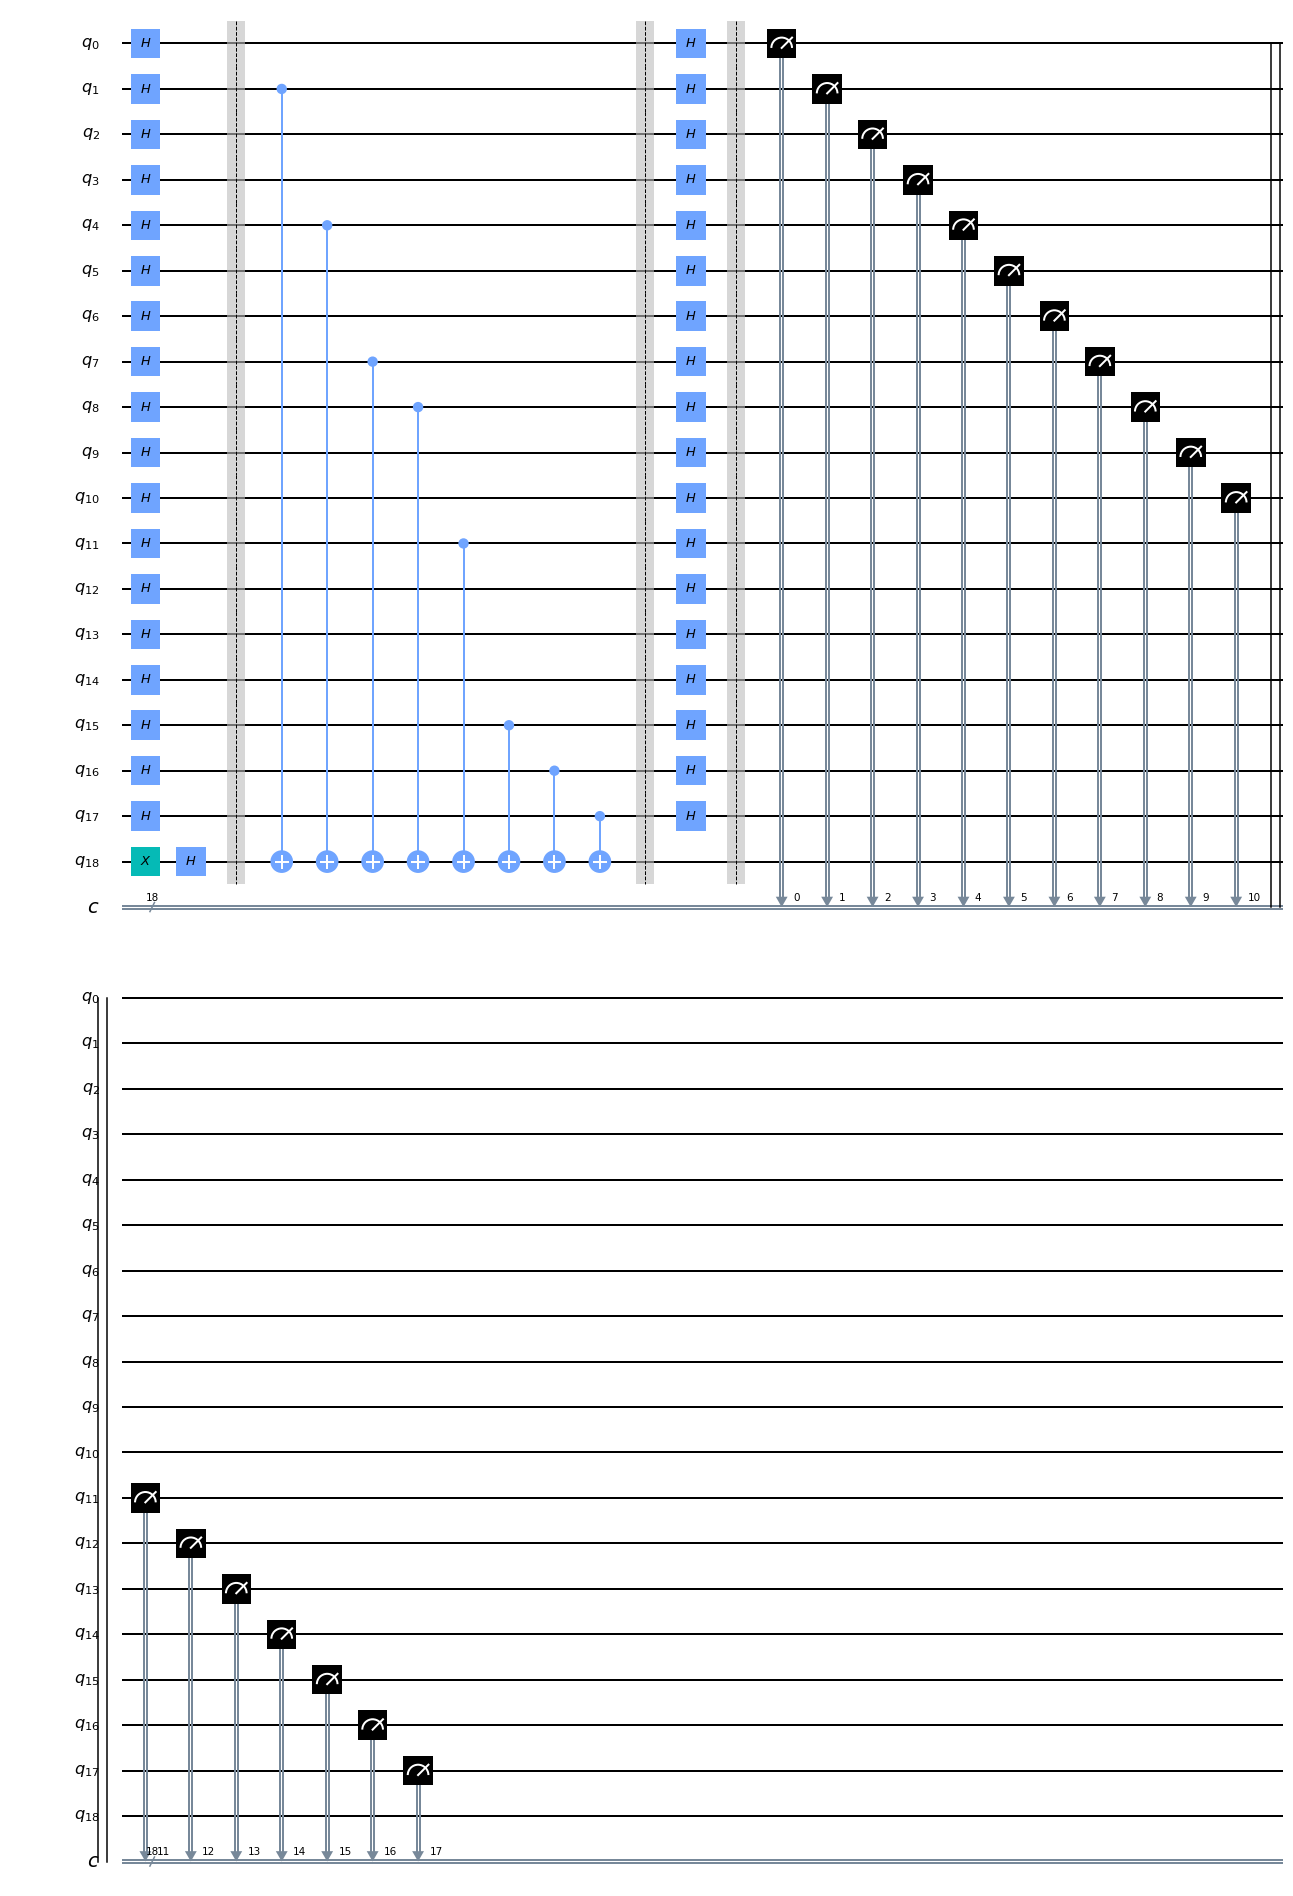

In [11]:
circuit.barrier()
#circuit.measure([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw(output='mpl')

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'111000100110010010': 1}
